### [작업1]
- openCV로 이미지 불러오기
- roi 영역에 별도 작업하기

In [ ]:
# 기본 사용법
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('./img01.jpg') # 샘플이미지 불러오기, 기본적으로 array로 불러옴
img[0]

In [ ]:
import numpy as np
plt.subplot(1,3,1)
plt.imshow(img)  ## rgb가 아닌 bgr로 출력됨

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  ## rgb가 아닌 bgr로 출력됨



In [ ]:
#다중조건
img[(img[:,:,0]>200)| (img[:,:,1]>200) |  (img[:,:,2]>200)]=[255,255,255]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  ## rgb가 아닌 bgr로 출력됨

In [ ]:
img=cv2.imread('./img01.jpg')
np.shape(img), img[200:210, 0:30]

In [ ]:
tmp=img[200:210, 0:30]
maxValue=np.max(tmp[0],axis=0)
maxValue

In [ ]:
#다중조건
img[(img[:,:,0]<maxValue[0]) & (img[:,:,1]<maxValue[1]) & (img[:,:,2]<maxValue[2])]=[0,0,0]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  ## rgb가 아닌 bgr로 출력됨

In [ ]:
# plt.imshow 가 아닌 cv2.imshow로하면 bgr을 rgb로 변경해서 출력해줌
# 별도의 창을 띄워서 
cv2.imshow('imgCaption',img)
cv2.waitKey(0)  # 사용자가 어떤 키를 누를때까지 윈도우 화면을 띄워줌
cv2.destroyAllWindows()


### [작업2] 마우스 이벤트 작업하기

1. 마우스로 사각형 그리기
2. 마우스로 지정한 영역 csv로 저장하기
3. 영역지정해서 필터 적용하기
4. 영역지정해서 모자이크 처리
5. 같은 위치의 다른 이미지로 채우가ㅣ
6. 이미지 복원하기
7. 마우스로 다각형 그리기
8. 마우스로 다각형으로 이미지 추출 후 저장하기

# 마우스 이벤트 다루기

![image.png](attachm0
https://076923.github.io/posts/Python-opencv-39/

### [작업1]: 마우스 클릭이벤트

In [ ]:
# 기본 사용법
import cv2
from datetime import datetime


def event_mous(event,x,y,flags,param):
    tmp=datetime.now().strftime('%Y.%m.%d - %H:%M:%S')
    print(tmp,'-->',x,y, img[x,y,:])

img=cv2.imread('./img01.jpg') # 샘플이미지 불러오기
cv2.namedWindow('img')#먼저 마우스 이벤트를 적용할 창을 만듦

cv2.setMouseCallback('img',event_mous)#만든 창에 마우스콜백설정함수(setMouseCallback)로 envent_mous 함수를 설정함

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
##############################################################
### 마우스 클릭하면 시간과 , 그 위치의 색상값이 나오게함
##############################################################
import cv2
from datetime import datetime


def event_mous(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        clickPostion = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:
            tmp=datetime.now().strftime('%Y.%m.%d - %H:%M:%S')
            print(tmp,'-->',x,y, img[x,y,:])
    
    
img=cv2.imread('./img01.jpg') 
cv2.namedWindow('img')
cv2.setMouseCallback('img',event_mous)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
##############################################################
### 마우스 클릭하는곳의 rgb값을 255,25,255 로 변경함
### 이 작업은 클릭한곳의 색상이 실시간으로 변경되지 않음
##############################################################
import cv2
from datetime import datetime

img=cv2.imread('./img01.jpg') 
def event_mous(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        clickPostion = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:
            tmp=datetime.now().strftime('%Y.%m.%d - %H:%M:%S')
            
            img[y:y+300,x:x+300,:]=255
            print(tmp,'-->',x,y, img[x,y,:])
    
cv2.namedWindow('img')
cv2.setMouseCallback('img',event_mous)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
## 위에서 클릭한 장소에 흰색으로 선택되어 있음.
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
##############################################################
### 마우스 클릭하는곳의 영역을 jpg파일로 저장함
### 마우스 클릭하는곳의 rgb값을 255,25,255 로 변경
##############################################################
import cv2
from datetime import datetime

img=cv2.imread('./img01.jpg') 
def event_mous(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        clickPostion = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:
            tmp=datetime.now().strftime('%Y.%m.%d - %H:%M:%S')
            varh,varw=20,50
            roi=img[y-varh:y+varh,x-varw:x+varw,:]
            cv2.imwrite('ROI.png',roi) # 다각형 추출한 ROI 저장
            
            img[y-varh:y+varh,x-varw:x+varw,:]=255
            print(tmp,'-->',x,y, img[x,y,:])
            cv2.imshow("img", img)
            

cv2.namedWindow('img')
cv2.setMouseCallback('img',event_mous)
temp = img.copy()

k = 0
# Close the window when key q is pressed
while k != ord('q'):
    cv2.imshow("img", img)
    k = cv2.waitKey(0)
   
    if (k == ord('c')):
        img = temp.copy()
        cv2.imshow("img", img)

cv2.destroyAllWindows()

In [ ]:
##### 오픈cv는 옵션을 지정하지 않으면 3채널이 기본값임.
navi=cv2.imread('./navi.png')
#navi=cv2.imread('./navi.png',cv2.IMREAD_UNCHANGED)

print(navi.shape)  ## (height, width, channel) 
varh,varw=20,50

resize = cv2.resize(navi, dsize=(varw*2,varh*2), interpolation=cv2.INTER_LINEAR)
print(resize.shape) 

cv2.imshow('img',resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#################################################
#### 마우스클릭하면 위에서 불러온 navi -> resize 이미지가 클릭한 위치에 생성됨
###################################################

import cv2
from datetime import datetime

img=cv2.imread('./img01.jpg') 
def event_mous(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        clickPostion = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:
            tmp=datetime.now().strftime('%Y.%m.%d - %H:%M:%S')
            varh,varw=20,50
            img[y-varh:y+varh,x-varw:x+varw,:]=resize
            
            
            
            print(tmp,'-->',x,y, img[x,y,:])
            cv2.imshow("img", img)

cv2.namedWindow('img')
cv2.setMouseCallback('img',event_mous)
temp = img.copy()

k = 0
# Close the window when key q is pressed'
while k != ord('q'):
    cv2.imshow("img", img)
    k = cv2.waitKey(0)
   
    if (k == ord('c')):
        img = temp.copy()
        cv2.imshow("img", img)

cv2.destroyAllWindows()

### [작업2]: 마우스로 사각형 그리기

In [ ]:
####################################################
# 1. 사각형 그리기
####################################################

import cv2
def drawRectangle(action, x, y, flags, parms):

    global top_left_corner, bottom_right_corner   #전역변수
  
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = (x, y)
    
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = (x, y)
        
        cv2.rectangle(image, top_left_corner, bottom_right_corner, (0, 255, 0),5)
        cv2.imshow("Window", image)


image = cv2.imread("./img01.jpg")
temp = image.copy()

cv2.namedWindow("Window")
cv2.setMouseCallback("Window", drawRectangle)

k = 0
# Close the window when key q is pressed
while k != ord('q'):
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
   
    if (k == ord('c')):
        image = temp.copy()
        cv2.imshow("Window", image)

cv2.destroyAllWindows()

In [ ]:
####################################
#### 마우스로 사각형 그리면 그 영역에 나비 이미지 합성
#### 단,배경이 투명하게 합성됨
#################################
import cv2
import pandas as pd
import numpy as np

# Lists to store the bounding box coordinates
top=[]
bottom=[]
# function which will be called on mouse input

xy=[]
def drawRectangle(action, x, y, flags, *userdata):
    global top,bottom

    if action == cv2.EVENT_LBUTTONDOWN:
        top=(x,y)

    elif action == cv2.EVENT_LBUTTONUP:
        bottom=(x,y)
        xy.append([top,bottom])

        w=abs(bottom[0]-top[0]) #사각형 가로 크기
        h=abs(bottom[1]-top[1]) #사각형 세로 크기
        
        #나비 사이즈 조절: 사각형 가로,세로 크기로 조절함
        tmp=cv2.resize(image2,(w,h))
        
        # 나비 알파채널 추출 
        mask_img=tmp[:,:,3]/255

        for c in range(3):
            #img[0:0+h,300:300+w,c]=(img2[:,:,c]*mask_img)+(img[0:0+h,300:300+w,c]*(1-mask_img))
        
            image[top[1]:bottom[1],top[0]:bottom[0],c]=((tmp[:,:,c]*mask_img)+(image[top[1]:bottom[1],top[0]:bottom[0],c]*(1-mask_img))).astype(np.uint8)
        cv2.imshow("Window", image)

#이미지 원본 불로오기 
image = cv2.imread("./img01.jpg")
image2=cv2.imread('./navi.png',cv2.IMREAD_UNCHANGED) #cv2.IMREAD_UNCHANGED: *.png 파일 불러오는 옵션 -1을 사용해도 됨
print(np.shape(image2))
temp = image.copy()

# 창이름 지정
cv2.namedWindow("Window")

# 마우스이벤트 콜백함수 호출
cv2.setMouseCallback("Window", drawRectangle)

k = 0
while k != ord('q'): # 키보드 q를 입력하면 종료
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    if (k == ord('c')):#키보드 'c'를 누르면 원본이미지 나옴
        image = temp.copy()
        cv2.imshow("Window", image)

cv2.destroyAllWindows()


### [작업3]:  마우스로 지정한 영역 csv로 저장하기

In [ ]:
####################################################
# 1. 사각형 그리기
####################################################
# Import packages

import cv2
import pandas as pd


top_left_corner = []
bottom_right_corner = []

xy=[]


def drawRectangle(action, x, y, flags, parms):
    global top_left_corner, bottom_right_corner
   
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = (x, y)
    
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = (x, y)
      
        
        xy.append([top_left_corner, bottom_right_corner])
        
        cv2.rectangle(image, top_left_corner, bottom_right_corner, (0, 255, 0),5)
        cv2.imshow("Window", image)


image = cv2.imread("./img01.jpg")
temp = image.copy()

cv2.namedWindow("Window")
cv2.setMouseCallback("Window", drawRectangle)

k = 0

while k != ord('q'):
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    
    if (k == ord('c')):
        image = temp.copy()
        cv2.imshow("Window", image)

cv2.destroyAllWindows()

df=pd.DataFrame(xy,columns=['top','bottom'])
print(df)
df.to_csv('얼굴.csv')

### [작업4]: 영역지정해서 필터 적용하기
> 이미지 비트 연산 <br>
https://ehpub.co.kr/tag/bitwise_not/


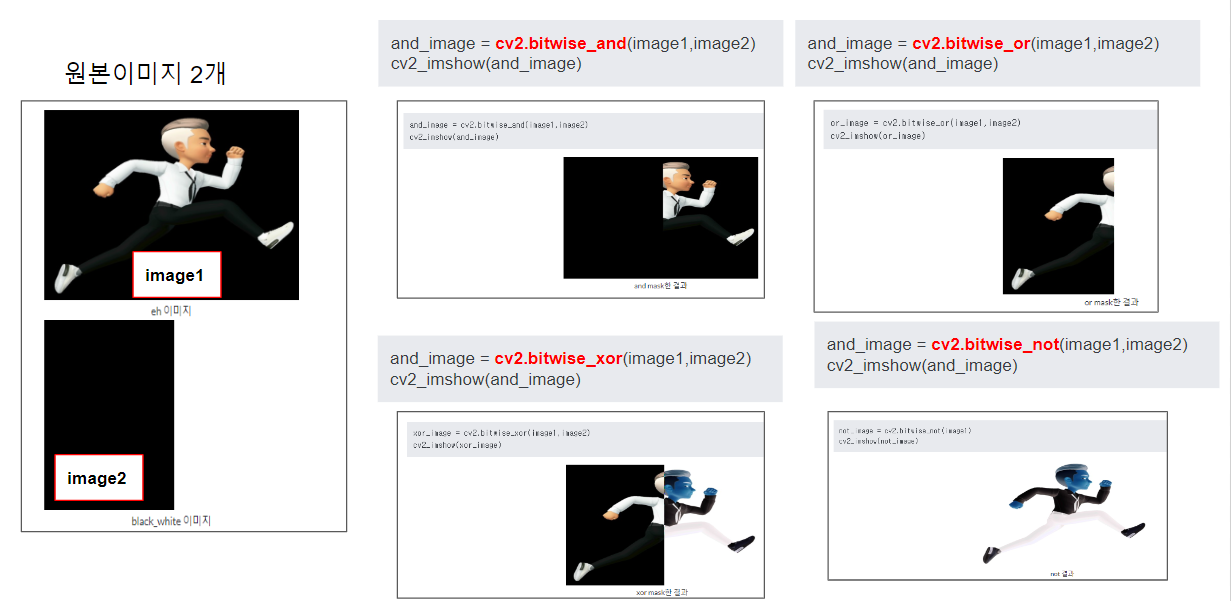

In [ ]:
import cv2
import pandas as pd


top=[]
bottom=[]

xy=[]
def drawRectangle(action, x, y, flags, *userdata):


    # Referencing global variables
    global top_left_corner, bottom_right_corner,top,bottom,image
    # Mark the top left corner when left mouse button is pressed
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        top=(x,y)
        #top.append([x,y])

    # When left mouse button is released, mark bottom right corner
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        bottom=(x,y)
        #bottom.append([x,y])
        xy.append([top,bottom])
        #xy.append(bottom)
        # Draw the rectangle
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 255, 0), 2, 8)
        #image[top[1]:bottom[1],top[0]:bottom[0]]=[255,255,255]
        image[top[1]:bottom[1],top[0]:bottom[0]]=cv2.bitwise_not(image[top[1]:bottom[1],top[0]:bottom[0]])
        cv2.imshow("Window", image)
        # 지정한 영역 필터 효과 넣기
        



# Read Images
image = cv2.imread("./img01.jpg")

temp = image.copy()
# Create a named window
cv2.namedWindow("Window")
# highgui function called when mouse events occur
cv2.setMouseCallback("Window", drawRectangle)

k = 0
# Close the window when key q is pressed
while k != ord('q'):
# Display the image
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    # If c is pressed, clear the window, using the dummy image
    if (k == ord('c')):
        image = temp.copy()
        cv2.imshow("Window", image)
        print(top)



cv2.destroyAllWindows()


df=pd.DataFrame(xy,columns=['top','bottom'])
print(df)
df.to_csv('얼굴.csv')




### [작업5].영역지정해서 모자이크 처리

In [ ]:
import cv2
import pandas as pd

top=[]
bottom=[]


xy=[]
def drawRectangle(action, x, y, flags, *userdata):

    global top_left_corner, bottom_right_corner,top,bottom,image

    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        top=(x,y)
      

    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        bottom=(x,y)
        
        xy.append([top,bottom])
          
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 255, 0), 2, 8)
       
        #모자이크 처리
        tmp=cv2.resize(image[top[1]:bottom[1],top[0]:bottom[0]], (10, 10))
        w=abs(bottom[0]-top[0])
        h=abs(bottom[1]-top[1])
        image[top[1]:bottom[1],top[0]:bottom[0]]=cv2.resize(tmp,(w,h))
        cv2.imshow("Window", image)
        # 지정한 영역 필터 효과 넣기
        



# Read Images
image = cv2.imread("./img01.jpg")
# Make a temporary image, will be useful to clear the drawing

temp = image.copy()
# Create a named window
cv2.namedWindow("Window")
# highgui function called when mouse events occur
cv2.setMouseCallback("Window", drawRectangle)

k = 0
# Close the window when key q is pressed
while k != 113:
# Display the image
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    # If c is pressed, clear the window, using the dummy image
    if (k == 99):
        image = temp.copy()
        cv2.imshow("Window", image)
        print(top)



cv2.destroyAllWindows()


df=pd.DataFrame(xy,columns=['top','bottom'])
print(df)
df.to_csv('얼굴.csv')


### [작업6]. 마우스로 다각형 그리기

In [ ]:
##############################################
# 마우스로 다각형 그리기
#  클릭, 클릭, 클릭하여서 poly 위치값 기억시키고 그 더블클릭하여서 위치값 마무리하여서 다각형 저장함
##############################################

import cv2
import numpy as np

point_list=[] #마우스 클릭했을 때 좌표 수집

def event_mous(event,x,y,flags,param):
    global point_list
    if event==cv2.EVENT_LBUTTONDOWN:#마우스 클릭
        point_list.append([x,y])
    if event==cv2.EVENT_LBUTTONDBLCLK:#마우스 더블클릭하면 다각형선이 그려짐
        point_list=np.array(point_list)#다각형의 좌표는 넘파이 배열이여야 함
        
        cv2.polylines(img,[point_list],True,(0,0,255),3) # 다각형 그리기
        cv2.imshow('img',img)
        

img=cv2.imread('./img01.jpg')
cv2.namedWindow('img')
cv2.setMouseCallback('img',event_mous,img)
temp = img.copy()

k = 0
while k != ord('q'):
    cv2.imshow("img", img)
    k = cv2.waitKey(0)
   
    if (k == ord('c')):
        img = temp.copy()
        cv2.imshow("img", img)

cv2.destroyAllWindows()
        

### [작업7] 합성곱에 대한 이해


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("./img01.jpg", cv2.IMREAD_GRAYSCALE)
img.shape

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
img.shape

In [ ]:
#세로선추출필터
filter = np.array([[1., 0., -1.],
                           [2., 0., -2.],
                           [1., 0., -1.]])
plt.imshow(filter,cmap='gray')

In [ ]:
new=[]
for h in range(489-3):
    new.append([])
    for w in range(640-3):
        val=np.sum(img[h:h+3,w:w+3]*filter)
        
        new[-1].append(val)


In [ ]:
np.max(new),np.shape(new)

In [ ]:
new=np.array(new,dtype='uint8')
np.max(new), plt.imshow(new,cmap='gray')

In [ ]:
# 가로선을 추출하기 위한 필터
horizontal_filter = np.array([[1., 2., 1.], 
                             [0., 0., 0.], 
                             [-1., -2., -1.]])
newh=[]
for h in range(489-3):
    newh.append([])
    for w in range(640-3):
        val=np.sum(img[h:h+3,w:w+3]*filter)
        if(val > 255):
                val = 255
        
        newh[-1].append(val)
#newh=np.array(newh,dtyp8e='uint8')
np.max(newh), plt.imshow(newh,cmap='gray')

In [ ]:
result=np.sqrt(new)+np.sqrt(newh)
re=result.astype('uint8')
plt.imshow(re, cmap='gray')